In [147]:
import ROOT
import uproot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as LogNorm
import matplotlib.ticker as ticker
import math
import pandas as pd

plt.rcParams['figure.figsize'] = [8, 8]

cornell_q2_xb = pd.read_csv("../data/exp_data/cornell_1977_q2_xb.txt", header=None)
jlab_q2_xb = pd.read_csv("../data/exp_data/jlab_2012_q2_xb.txt", header=None)
jlab_q2_w2 = pd.read_csv("../data/exp_data/jlab_2012_q2_w2.txt", header=None)
jlab_q2_z = pd.read_csv("../data/exp_data/jlab_2012_q2_z.txt", header=None)
print(jlab_q2_z)

     0     1     2     3     4     5     6     7     8     9     10    11  \
0  2.30  2.30  2.30  2.30  2.30  2.30  2.30  2.30  1.85  2.30  2.80  3.30   
1  0.37  0.42  0.49  0.56  0.64  0.74  0.85  0.97  0.55  0.55  0.55  0.55   

     12    13    14  
0  3.80  4.30  2.30  
1  0.55  0.55  0.55  


In [157]:
def setTitle2D( ax, key):
	if "Beta" in key or "Min" in key or "Pos" in key:
		ax.set_xlabel(r"$p_{\pi}$ [GeV]", fontsize=18)
		ax.set_ylabel(r"$\beta$", fontsize=18)
	else:
		if "Q2_omega" in key:
			plt.xlabel(r"$Q^2$ [GeV$^2$]", fontsize=18)
			plt.ylabel(r"$\omega$ [GeV]", fontsize=18)
		if "Q2_W" in key:
			plt.xlabel(r"$Q^2$ [GeV$^2$]", fontsize=18)
			plt.ylabel(r"$W$ [GeV]", fontsize=18)
		if "Q2_Z" in key:
			plt.xlabel(r"$Q^2$ [GeV$^2$]", fontsize=18)
			plt.ylabel(r"$z$", fontsize=18)
		if "Q2_Xb" in key:
			plt.xlabel(r"$Q^2$ [GeV$^2$]", fontsize=18)
			plt.ylabel(r"$x_B$", fontsize=18)


In [167]:
def makePlot(keyName, fig):
    hist = inFile[keyName]


    values = hist.values()
    values[values == 0] = np.nan

    xEdges = hist.axis(0).edges()
    yEdges = hist.axis(1).edges()

    plt.tick_params(which='both', width=2, labelsize=14)
    plt.tick_params(which='major', length=7, labelsize=14)
    plt.tick_params(which='minor', length=4, labelsize=14)

    plt.pcolormesh(xEdges, yEdges, values.T, cmap='winter', shading='auto')#, norm="log")
    setTitle2D( fig, key )


#drawCut2D( axs[0], key )		
#setTitle2D( axs[0], key )


[[2.3  1.85 2.3  2.8  3.3  3.8  4.3 ]
 [5.7  6.16 5.7  5.2  4.7  4.2  3.7 ]]


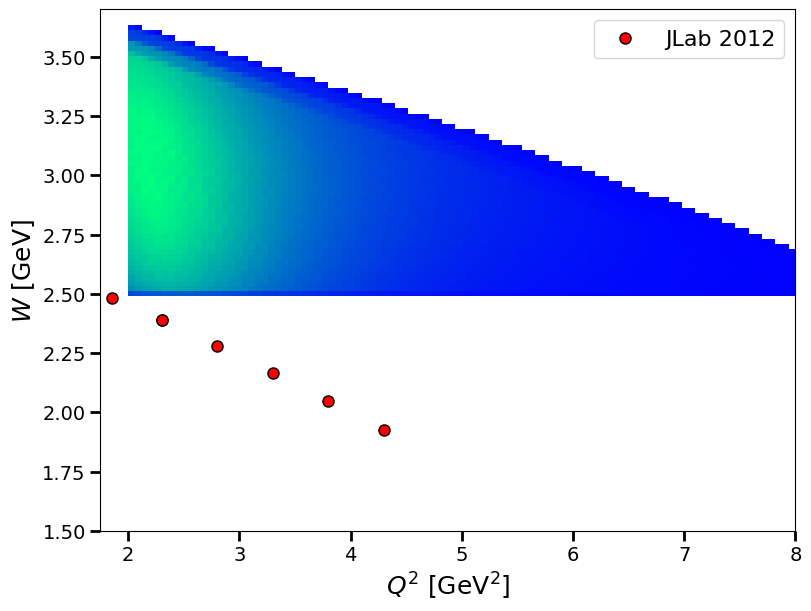

In [173]:
inFile = uproot.open("../histograms/analysis_note/kinematic_plots_data_allE.root")

key = 'hQ2_W_pip_0_0;2'

figure = plt.figure(figsize=(8,6), layout='constrained')

makePlot( key, figure)
jlab_q2_w2_array = np.asarray( jlab_q2_w2)
print(jlab_q2_w2_array)
plt.plot( jlab_q2_w2_array[0], np.sqrt(jlab_q2_w2_array[1]), linestyle=' ', marker='o',color='red', ms=8, mec='black', label='JLab 2012')
plt.xlim(1.75, 8)
plt.legend(fontsize=16)
plt.savefig("/volatile/clas12/users/jphelan/SIDIS/analysis_note/kinematics_2d/hQ2_W.pdf")


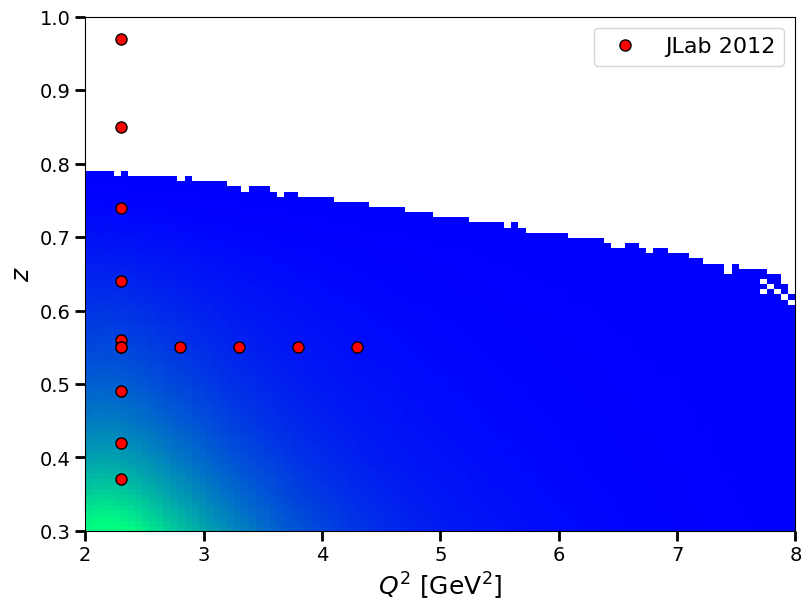

In [171]:
inFile = uproot.open("../histograms/analysis_note/kinematic_plots_data_allE.root")

key = 'hQ2_Z_pip_0_0;2'
figure = plt.figure(figsize=(8,6), layout='constrained')

makePlot( key, figure )
jlab_q2_z_array = np.asarray( jlab_q2_z)
plt.plot( jlab_q2_z_array[0], jlab_q2_z_array[1], linestyle=' ', marker='o', color='r', ms=8, mec='black', label="JLab 2012")
plt.xlim(2, 8)
plt.legend(fontsize=16)
plt.savefig("/volatile/clas12/users/jphelan/SIDIS/analysis_note/kinematics_2d/hQ2_Z.pdf")

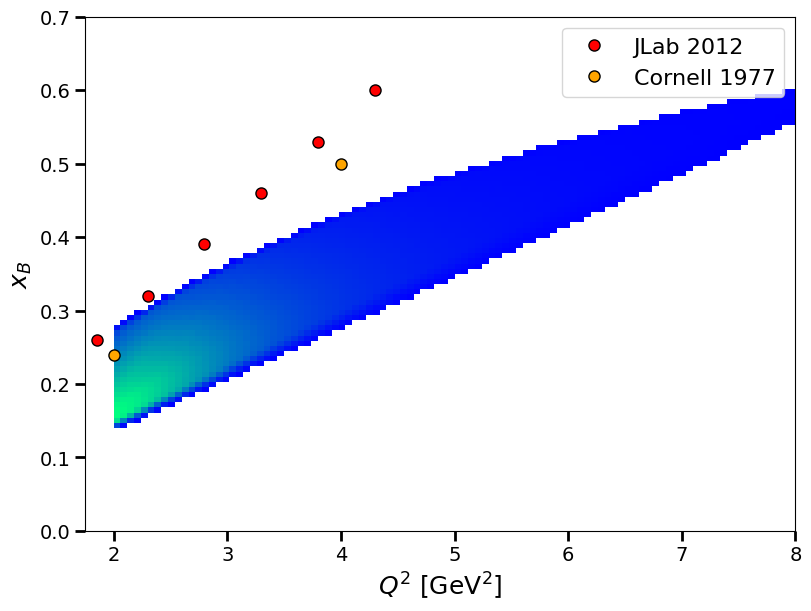

In [172]:
inFile = uproot.open("../histograms/analysis_note/kinematic_plots_data_allE.root")

key = 'hQ2_Xb_pip_0_0;2'
figure = plt.figure(figsize=(8,6), layout='constrained')

makePlot( key, figure )
jlab_q2_xb_array = np.asarray( jlab_q2_xb)
plt.plot( jlab_q2_xb_array[0], jlab_q2_xb_array[1], linestyle=' ', marker='o', color='r', ms=8, mec='black', label="JLab 2012")
cornell_q2_xb_array = np.asarray( cornell_q2_xb)
plt.plot( cornell_q2_xb_array[0], cornell_q2_xb_array[1], linestyle=' ', marker='o', color='orange', ms=8, mec='black', label="Cornell 1977")
plt.xlim(1.75, 8)
plt.legend(fontsize=16)
plt.savefig("/volatile/clas12/users/jphelan/SIDIS/analysis_note/kinematics_2d/hQ2_Xb.pdf")